In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from xgboost import XGBClassifier

In [172]:
# Read Dataset
newDF = pd.read_csv(r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 2\Project\Dataset\finalDF.csv')
newDF

,Product,Brand,Price,Rating,Reviews,ReviewVotes,TokenizeReviews,Polarity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"['feel', 'lucky', 'phone', 'hard', 'phone', 'u...",1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"['nice', 'phone', 'nice', 'grade', 'pantach', ...",1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,['pleased'],1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"['work', 'good', 'slow', 'good', 'phone', 'love']",1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"['great', 'phone', 'replace', 'lost', 'phone',...",1
...,...,...,...,...,...,...,...,...
372499,ZTE Groove X501 Cricket Phone,ZTE,31.11,2,Delivery expectation was great. But unfortunat...,1.0,"['delivery', 'expectation', 'great', 'phone', ...",1
372500,ZTE Sprint S155 Wego Kids Cell Phone,ZTE,21.77,1,"unable to use this; according to my DIL, only ...",0.0,"['unable', 'dil', 'receive', 'call', 'useless'...",-1
372501,ZTE Sprint S155 Wego Kids Cell Phone,ZTE,21.77,1,Got it and it has service but won't let me con...,0.0,"['service', 'connect', 'ergo', 'portal', 'phon...",-1
372502,ZTE Sprint S155 Wego Kids Cell Phone,ZTE,21.77,1,This is just a copy of answer I provided earli...,2.0,"['copy', 'answer', 'provided', 'earlierdo', 'b...",1


In [185]:
newDF.dtypes

Product             object
Brand               object
Price              float64
Rating               int64
Reviews             object
ReviewVotes        float64
TokenizeReviews     object
Polarity             int64
dtype: object

In [133]:
#cols = ['Polarity', 'Rating']
#newDF[cols] = newDF[cols].astype('category')

In [174]:
# Dataframe with product, brand and reviews
productDF = newDF.groupby((['Product', 'Brand']), as_index=False, sort=True)['Reviews'].count()
productDF

,Product,Brand,Reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,37
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,73
2,'ATT Wireless LG CU720 Shine for in Red',LG,5
3,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,BlackBerry,8
4,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,24
...,...,...,...
4036,"verykool s5017 Dorado 4G HSPA+ 5.0"" IPS LCD Un...",verykool,84
4037,"verykool s505 Spark 5.0"" IPS TFT LCD 1.3GHz Qu...",verykool,8
4038,verykool s5510 Juno HSPA+ Factory Unlocked GSM...,verykool,68
4039,"verykool s5511 Juno Quatro 5.5"" LCD 4G Unlocke...",verykool,20


In [175]:
# Number of products and reviews for each brand
productDF.groupby('Brand')['Reviews'].agg(['count', 'sum']).sort_values('count', ascending=False)
#productDF.groupby('Brand')['Product'].agg(['count']).sort_values('count', ascending=False)

,count,sum
Brand,,
Samsung,712,82134
Others,445,11367
BLU,438,67794
Apple,422,75214
LG,320,29731
Nokia,271,19216
Motorola,214,15161
HTC,211,13464
Sony,206,10291


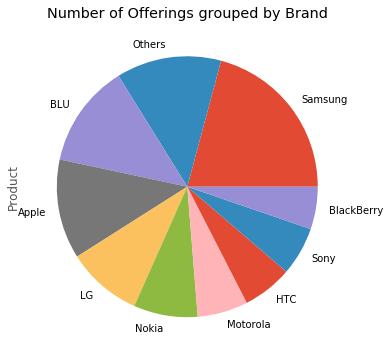

In [137]:
# Plot piechart for number of products for each brand (Top 10)
top10 = productDF.groupby('Brand').count()['Product'].sort_values(ascending=False).head(10)
plt.style.use("ggplot")
# Brand distribution
ax = top10.plot(kind="pie", 
               figsize=(10, 6),
               title="Number of Offerings grouped by Brand")
plt.show()

In [5]:
# Split test set and training set
x_train, x_test, y_train, y_test = train_test_split(
    newDF.Reviews, newDF.Polarity, random_state=0)
x_train.isnull().sum()

0

In [7]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

scores = cross_val_score(LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

X_train:
<279378x20131 sparse matrix of type '<class 'numpy.int64'>'
	with 7551571 stored elements in Compressed Sparse Row format>
Number of features: 20131
Mean cross-validation accuracy: 0.954


In [ ]:
# XGBoost
scores = cross_val_score(XGBClassifier(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

In [ ]:
# Logistic Regression with vectorizer
logreg = LogisticRegression(C=0.1, solver='lbfgs', multi_class='auto', max_iter=3000).fit(X_train, y_train)
X_test = vectorizer.transform(x_test)
log_y_pred = logreg.predict(X_test)
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

In [ ]:
# Confusion Matrix
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)

In [186]:
# Dataframe of Samsung product
samsungDF = newDF[newDF['Brand'] == 'Samsung']
samsungDF

,Product,Brand,Price,Rating,Reviews,ReviewVotes,TokenizeReviews,Polarity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"['feel', 'lucky', 'phone', 'hard', 'phone', 'u...",1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"['nice', 'phone', 'nice', 'grade', 'pantach', ...",1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,['pleased'],1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"['work', 'good', 'slow', 'good', 'phone', 'love']",1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"['great', 'phone', 'replace', 'lost', 'phone',...",1
...,...,...,...,...,...,...,...,...
371430,Verizon or PagePlus Samsung Smooth U350 Great ...,Samsung,10.44,1,The phone I received was a pre-paid phone and ...,6.0,"['phone', 'received', 'prepaid', 'phone', 'ver...",0
371431,Verizon or PagePlus Samsung Smooth U350 Great ...,Samsung,10.44,1,I purchased this phone as a replacement for an...,11.0,"['purchased', 'phone', 'replacement', 'phone',...",0
371432,Verizon or PagePlus Samsung Smooth U350 Great ...,Samsung,10.44,4,We purchased this Samsung U350 CDMA flip phone...,NaN,"['purchased', 'samsung', 'cdma', 'flip', 'phon...",0
371433,Verizon or PagePlus Samsung Smooth U350 Great ...,Samsung,10.44,5,I am handicapped and aged. I needed a Cell pho...,4.0,"['handicapped', 'aged', 'needed', 'cell', 'pho...",-1


Text(0, 0.5, 'Number of Reviews')

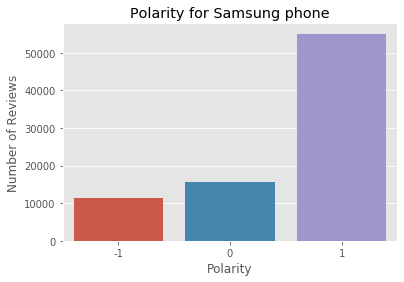

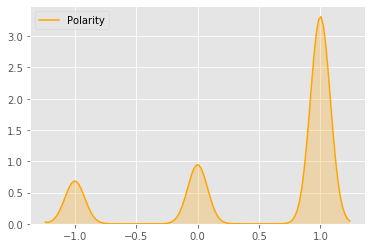

In [178]:
sns.kdeplot(samsungDF['Polarity'],shade=True,color="orange")

In [179]:
samsungDF.groupby(['Product', 'Polarity'])['Reviews'].agg(['count']).sort_values('Product', ascending=True)

count
Product                                            Polarity       
"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D70... -1            4
                                                    0            3
                                                    1           30
ASUS ZenFone 2 (ZE551ML) Unlocked Cellphone,5.5... -1            2
                                                    0            3
...                                                            ...
Verizon Wireless Cell Phone Samsung Gusto U360 ...  0           10
                                                    1           15
Verizon or PagePlus Samsung Smooth U350 Great C...  0           17
                                                   -1           10
                                                    1           16

[1851 rows x 1 columns]

In [180]:
# Samsung phone with most reviews
samsungDF.groupby(['Product'])['Reviews'].agg(['count']).sort_values('count', ascending=False)

,count
Product,
Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black,1109
"Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White",1108
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White,1096
Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White,1095
"Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone, 16GB, Blue",1042
...,...
Samsung Galaxy J1 Ace J111M 8GB Unlocked GSM Quad-Core Android LolliPop Smartphone - White (International Version),1
"Samsung Galaxy express Prime Unlocked 4G LTE J320A 16GB Quad Core LCD 5"" Android 6.0 Desbloqueado",1
SAMSUNG GALAXY S6 EDGE+ PLUS 32GB SM-G928F GOLD PLATINUM FACTORY UNLOCKED 4G/LTE CELL PHONE,1


In [228]:
samsungDF[samsungDF.Polarity == 1].groupby('Product').count()['Reviews']

Product
"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN                                                                                                                                                                                                                                                                                                      30
ASUS ZenFone 2 (ZE551ML) Unlocked Cellphone,5.5 inch 4GB RAM 32GB ROM Android 5.0 Smartphone.(Gray)                                                                                                                                                                                                                                                                                                            12
BLACK Samsung Galaxy S II Epic 4G Touch SPH-D710 - BLACK (Sprint) Smartphone. CLEAN ESN!                                                                                                    

In [206]:
# Samsung phone with most positive reviews
samsungDF[samsungDF.Polarity == 1].groupby(['Product'])['Reviews'].agg(['count']).sort_values('count', ascending=False)

,count
Product,
"Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone, 16GB, Blue",708
Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black,699
Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White,696
"Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White",686
"Samsung Galaxy Exhibit 4G (T-Mobile), t679",673
...,...
Samsung Galaxy S II LTE i9210 Black Factory Unlocked LTE BANDS 800 / 1800 / 2600 no warranty,1
Samsung I8552 Galaxy Win Dual Sim Unlocked Smartphone - 3G Network 900 / 2100 - Free Tmvel Dual USB Car Charger,1
Samsung Galaxy Note 4 N910G 32GB 4G LTE Unlocked GSM Octa-Core Smartphone - Gold,1


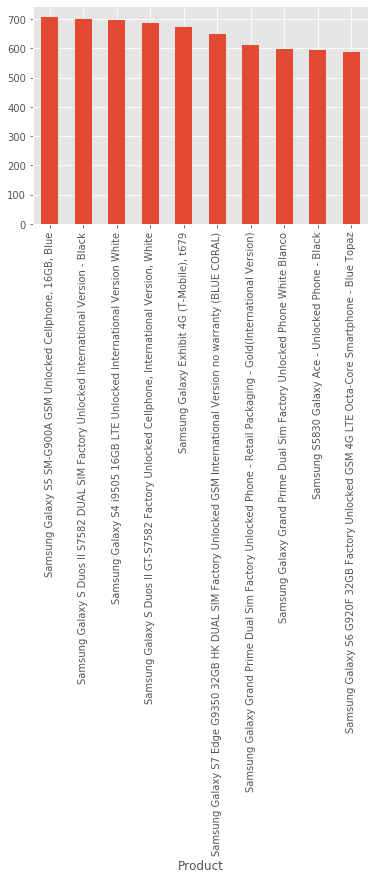

In [243]:
# Top 10 Samsung phones with most positive reviews
top10 = samsungDF[samsungDF.Polarity == 1].groupby('Product').count()['Reviews'].sort_values(ascending=False).head(10)
top10.plot(kind='bar')

In [249]:
# Dataframe of Top 10 Samsung phones with most positive reviews
top10DF = pd.DataFrame({'Product':top10.index, 'TotalReviews':top10.values})
top10DF

,Product,TotalReviews
0,Samsung Galaxy S5 SM-G900A GSM Unlocked Cellph...,708
1,Samsung Galaxy S Duos II S7582 DUAL SIM Factor...,699
2,Samsung Galaxy S4 i9505 16GB LTE Unlocked Inte...,696
3,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,686
4,"Samsung Galaxy Exhibit 4G (T-Mobile), t679",673
5,Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM ...,648
6,Samsung Galaxy Grand Prime Dual Sim Factory Un...,613
7,Samsung Galaxy Grand Prime Dual Sim Factory Un...,599
8,Samsung S5830 Galaxy Ace - Unlocked Phone - Black,593
9,Samsung Galaxy S6 G920F 32GB Factory Unlocked ...,586


[Text(0, 0, 'Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone, 16GB, Blue'),
 Text(0, 0, 'Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black'),
 Text(0, 0, 'Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White'),
 Text(0, 0, 'Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White'),
 Text(0, 0, 'Samsung Galaxy Exhibit 4G (T-Mobile), t679'),
 Text(0, 0, 'Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM Factory Unlocked GSM International Version no warranty (BLUE CORAL)'),
 Text(0, 0, 'Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone - Retail Packaging - Gold(International Version)'),
 Text(0, 0, 'Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone White Blanco'),
 Text(0, 0, 'Samsung S5830 Galaxy Ace - Unlocked Phone - Black'),
 Text(0, 0, 'Samsung Galaxy S6 G920F 32GB Factory Unlocked GSM 4G LTE Octa-Core Smartphone - Blue Topaz')]

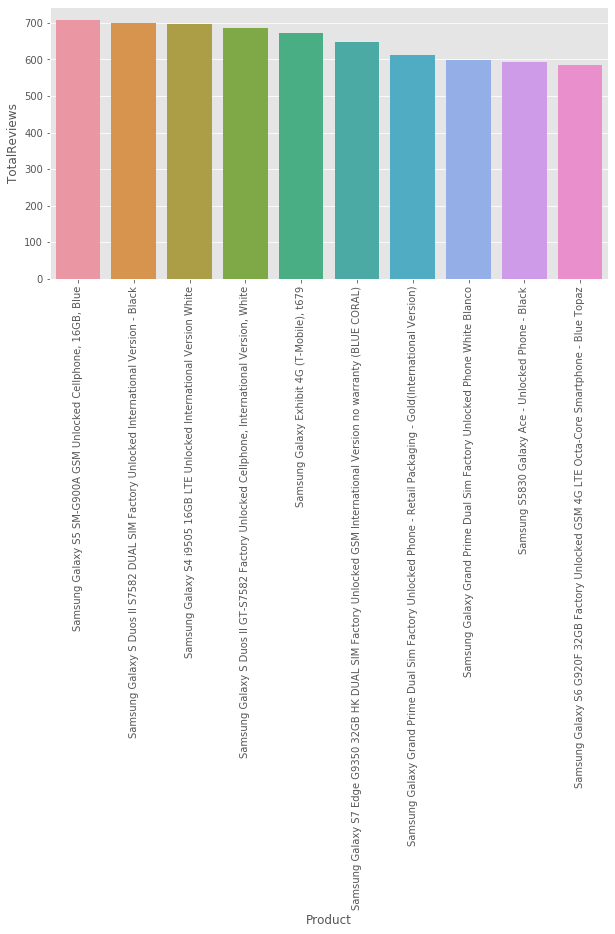

In [255]:
# Dataframe of Top 10 Samsung phones with most positive reviews (Seaborn)
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=top10DF,
    x='Product',
    y='TotalReviews'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)